In [1]:
#Forward in time central in space for 1D heat equation

import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
pyplot.rcParams['font.size'] = 16

In [3]:
L = 1.0
nx =51
dx = L / (nx-1)
alpha = 1.22e-3

x = numpy.linspace(0.0, L, num=nx)

T0 = numpy.zeros(nx)
T0[0] = 100.0

In [8]:
#Explicit scheme
def ftcs(T0, nt, dt, dx, alpha):
    T = T0.copy() #deep copy so we do not change the value of initial condition
    sigma = alpha * dt / dx**2
    for n in range(nt):
        T[1 : -1] = T[1 : -1] + sigma* (T[:-2] - 2*T[1: -1] + T[2:] )
        T[0] = 100.0
        T[-1] = 0.0 #bu iki line i comment etsem de etmesem de ayni sonucu alacagim
    return T

In [9]:
nt = 100
sigma = 0.5
dt = sigma * dx**2 / alpha

T = ftcs(T0, nt, dt, dx, alpha)

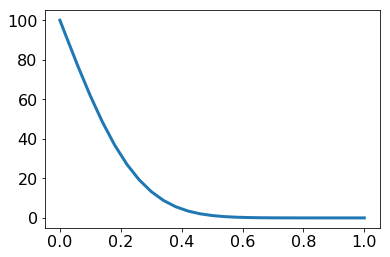

In [10]:
pyplot.plot(x, T, lw=3)

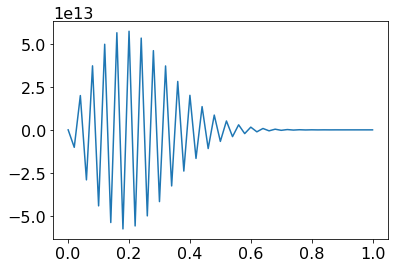

In [11]:
nt = 100
sigma = 0.6
dt = sigma * dx**2 / alpha

T = ftcs(T0, nt, dt, dx, alpha)
pyplot.plot(x, T)

In [12]:
#Dirichlet condition on the left side, Neumann condition on the right side
def ftcs_mixed_bcs(T0, nt, dt, dx, alpha):
    T = T0.copy()
    sigma = alpha * dt / dx**2
    for n in range(nt):
        T[1 : -1] = T[1 : -1] + sigma* (T[: -2] - 2*T[1: -1] + T[2:])
        #Neumann condition with a zero gradient value
        T[-1] = T[-2]
    return T

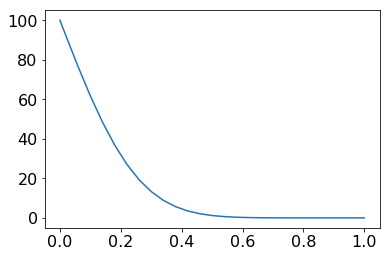

In [16]:
nt = 100
sigma = 0.5
dt = sigma * dx**2 / alpha

T = ftcs_mixed_bcs(T0, nt, dt, dx, alpha)
pyplot.plot(x, T)

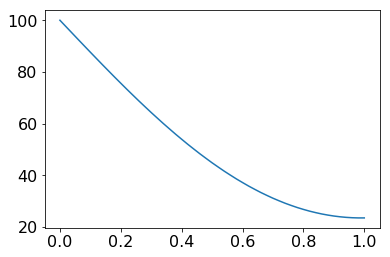

In [17]:
nt = 1000
sigma = 0.5
dt = sigma * dx**2 / alpha

T = ftcs_mixed_bcs(T0, nt, dt, dx, alpha)
pyplot.plot(x, T)
#Notice this time temperature is around 25 degrees
#Forward in time is an explicit scheme 